In [1]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [2]:
from sklearn import datasets
df=datasets.make_hastie_10_2()
df

(array([[-1.09171826,  0.54650652,  1.66142098, ..., -0.64926254,
         -1.90075988,  1.44293493],
        [-1.20698588,  0.33378688, -0.8241329 , ..., -0.805569  ,
         -0.01394532,  0.62967063],
        [ 0.19011528, -0.64003795, -0.77121631, ...,  0.8614057 ,
          1.43196088,  0.38503929],
        ...,
        [ 0.76744884,  0.75422343,  1.97667636, ...,  0.14161419,
          0.94138865,  0.50319828],
        [ 0.89908096, -1.13019904,  0.13627849, ...,  0.01166048,
          1.57920381, -1.93815427],
        [ 1.39207994, -1.33370356, -0.72028143, ..., -0.19048341,
          0.318094  , -1.62538985]]),
 array([ 1., -1., -1., ...,  1., -1.,  1.]))

In [3]:
X, y = datasets.make_hastie_10_2(random_state=0)
x_train, x_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
ml=clf.fit(x_train, y_train)
ml

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [5]:
clf.score(x_test,y_test)

0.913

In [6]:
y_pred=clf.predict(x_test)
y_pred

array([ 1., -1., -1., ..., -1.,  1.,  1.])

In [7]:
from sklearn import metrics
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        -1.0       0.92      0.91      0.91      5135
         1.0       0.90      0.92      0.91      4865

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [8]:
metrics.confusion_matrix(y_pred,y_test)

array([[4657,  478],
       [ 392, 4473]], dtype=int64)

<AxesSubplot:>

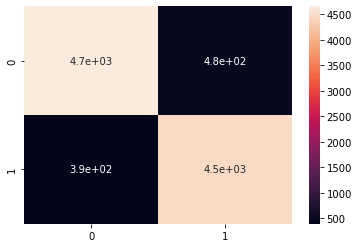

In [9]:
import seaborn as sn
cm=metrics.confusion_matrix(y_pred,y_test)
sn.heatmap(cm,annot=True)

In [10]:
metrics.accuracy_score(y_pred,y_test)

0.913

In [11]:
metrics.recall_score(y_pred,y_test)

0.9194244604316547

In [12]:
metrics.precision_score(y_pred,y_test)

0.9034538477075338

In [13]:
metrics.f1_score(y_pred,y_test)

0.9113691931540342

In [14]:
metrics.mean_squared_error(y_pred,y_test)

0.348

In [15]:
metrics.mean_absolute_error(y_pred,y_test)

0.174

In [16]:
metrics.r2_score(y_pred,y_test)

0.6517461229236112

In [17]:
#root mean square error
import math
import numpy as np
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=math.sqrt(MSE)
RMSE

0.589915248150105

In [18]:
#Adjusted R2 score
import numpy as np
r2_score=metrics.r2_score(y_test,y_pred)
n=y_test.shape[0]
p=3
x=(1-r2_score)
y=(n-1)/(n-p-1)
adj_r2=(1-(x*y))
print('Adjusted_R2:',adj_r2)

Adjusted_R2: 0.6518621230615881


In [19]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,x_train,y_train,cv=10)
score

array([0.925, 0.93 , 0.91 , 0.95 , 0.935, 0.9  , 0.91 , 0.89 , 0.905,
       0.91 ])

In [20]:
score.mean()

0.9164999999999999

In [21]:
score.std()*2

0.03436568055487916

In [22]:
from sklearn.model_selection import GridSearchCV
param={ 'n_estimators': [50, 100, 150],'learning_rate': [0.01, 0.1, 1]}
                  #'max_depth': [3, 5, 7],'subsample': [0.5, 0.7, 1],'max_features': ['auto', 'sqrt', 'log2']
gb_hpt=GridSearchCV(clf,param,cv=5,scoring='accuracy')
gb_hpt.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                  max_depth=1, random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [23]:
gb_hpt.best_estimator_

GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=150,
                           random_state=0)

In [24]:
gb_hpt.best_index_

8

In [25]:
gb_hpt.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [26]:
gb_hpt.best_score_

0.9279999999999999

In [27]:
gb_hpt.cv_results_

{'mean_fit_time': array([0.2149682 , 0.43288875, 0.64303236, 0.21127486, 0.4440331 ,
        0.66105561, 0.23067775, 0.43526249, 0.68083014]),
 'std_fit_time': array([0.00694552, 0.00533132, 0.01835879, 0.01612424, 0.005432  ,
        0.01274041, 0.0050277 , 0.00680344, 0.00611431]),
 'mean_score_time': array([0.00162783, 0.00181689, 0.00219922, 0.0014451 , 0.00201812,
        0.00190969, 0.00160265, 0.00198507, 0.00221539]),
 'std_score_time': array([5.07309126e-04, 4.09971062e-04, 4.46504810e-04, 8.36035305e-04,
        6.14279602e-04, 1.82481562e-04, 4.89502572e-04, 2.37242660e-05,
        3.50460130e-04]),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 150, 50, 100, 150, 50, 100, 150],
              mask=[False, False, False, False, False, 

In [28]:
import pandas as pd
data=pd.DataFrame(gb_hpt.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.214968,0.006946,0.001628,0.000507,0.01,50,"{'learning_rate': 0.01, 'n_estimators': 50}",0.6225,0.6150,0.6225,0.6050,0.6275,0.6185,0.007842,9
1,0.432889,0.005331,0.001817,0.000410,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",0.6575,0.6450,0.6550,0.6625,0.6450,0.6530,0.006964,8
2,0.643032,0.018359,0.002199,0.000447,0.01,150,"{'learning_rate': 0.01, 'n_estimators': 150}",0.6875,0.6875,0.6675,0.7050,0.6475,0.6790,0.019723,7
3,0.211275,0.016124,0.001445,0.000836,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.7675,0.8025,0.7350,0.7725,0.7625,0.7680,0.021587,6
4,0.444033,0.005432,0.002018,0.000614,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.8150,0.8450,0.7975,0.8175,0.8175,0.8185,0.015215,5
5,0.661056,0.012740,0.001910,0.000182,0.1,150,"{'learning_rate': 0.1, 'n_estimators': 150}",0.8150,0.8575,0.8475,0.8550,0.8525,0.8455,0.015604,4
6,0.230678,0.005028,0.001603,0.000490,1,50,"{'learning_rate': 1, 'n_estimators': 50}",0.8975,0.8850,0.8750,0.8900,0.9050,0.8905,0.010296,3
7,0.435262,0.006803,0.001985,0.000024,1,100,"{'learning_rate': 1, 'n_estimators': 100}",0.9025,0.9200,0.9125,0.9075,0.9150,0.9115,0.006042,2
8,0.680830,0.006114,0.002215,0.000350,1,150,"{'learning_rate': 1, 'n_estimators': 150}",0.9200,0.9375,0.9375,0.9250,0.9200,0.9280,0.007969,1


In [29]:
data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.214968,0.006946,0.001628,0.000507,0.01,50,"{'learning_rate': 0.01, 'n_estimators': 50}",0.6225,0.6150,0.6225,0.6050,0.6275,0.6185,0.007842,9
1,0.432889,0.005331,0.001817,0.000410,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",0.6575,0.6450,0.6550,0.6625,0.6450,0.6530,0.006964,8
2,0.643032,0.018359,0.002199,0.000447,0.01,150,"{'learning_rate': 0.01, 'n_estimators': 150}",0.6875,0.6875,0.6675,0.7050,0.6475,0.6790,0.019723,7
3,0.211275,0.016124,0.001445,0.000836,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.7675,0.8025,0.7350,0.7725,0.7625,0.7680,0.021587,6
4,0.444033,0.005432,0.002018,0.000614,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.8150,0.8450,0.7975,0.8175,0.8175,0.8185,0.015215,5
